### Developing the Word embeddings without pre-trained word embeddings

In [1]:
# importing module
import sys
module='../modules'
if module not in sys.path: sys.path.append(module)
import myutils

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

import keras

Using TensorFlow backend.


In [3]:
from keras.preprocessing.text import Tokenizer
from keras import models, layers, optimizers, losses, metrics

#### Reading the data from raw files

In [4]:
path = '../../datasets/imdb/train/'
labels = ['pos', 'neg']


data = []
label = []
for l in labels:
    data_dir = os.path.join(path, l)
    print(data_dir)
    for file in os.listdir(data_dir):
        
        if file[-4:]=='.txt':
            with open(os.path.join(data_dir,file), encoding='utf8') as f:
                data.append(f.read())
                if l == 'pos':
                    label.append(1)
                else:
                    label.append(0)
                    
print("Data Length: ", len(data))
print("Label Length: ", len(label))

../../datasets/imdb/train/pos
../../datasets/imdb/train/neg
Data Length:  25000
Label Length:  25000


In [5]:
data[:2]

['"Kalifornia"is a great film that makes us look at ourselves.The film has a great cast,Brad Pitt(Johnny Suede,A River Runs Through It,and The Legends Of The Fall)as Early Grayce,David Duchovny(The X Files)as Brian Kessler,Michelle Forbes(Star Trek:The Next Generation,Homicide:Life On The Street,and Escape From L.A.)as Carrie Loughlin,Brian\'s girlfriend,and Juliette Lewis(Natural Born Killers,Cape Fear,and What\'s Eating Gilbert Grape)as Adele Corners,Early\'s girlfriend.<br /><br />Brian Kessler is a writer who is a Liberal,is getting ready to write a book about serial killers.Brian and his girlfriend,Carrie decide they want to move to California,so Brian places an ad at the college for some who wants to go to California,to share expenses on the trip.<br /><br />Early Grayce is an ex con and sociopath on parole,who recently lost his job at the mirror factory in town,is in debt,owes his landlord money.Early\'s parole officer stops to visit him and tells him about a job.Early goes to t

#### Generating index

In [6]:
max_words = 10000
max_len = 100

In [7]:
tokens = Tokenizer(num_words=max_words)
tokens.fit_on_texts(data)

In [8]:
# getting index
word_index = tokens.word_index
print(type(word_index))
print("Length of Word_Index",len(word_index))

<class 'dict'>
Length of Word_Index 88582


In [9]:
sents = tokens.texts_to_sequences(data)
print(sents[:1])
print("Total Sentenses: ", len(sents))

[[9092, 6, 3, 84, 19, 12, 163, 175, 165, 30, 3129, 1, 19, 44, 3, 84, 174, 2766, 2735, 1802, 3, 1866, 1126, 140, 9, 2, 1, 5674, 4, 1, 804, 14, 399, 624, 8169, 1, 1740, 5456, 14, 1614, 2847, 8595, 320, 2137, 1, 372, 2232, 6041, 110, 20, 1, 887, 2, 1086, 36, 2006, 3, 14, 3866, 976, 2, 6627, 2070, 1245, 1442, 2161, 6628, 1088, 2, 800, 1883, 6985, 14, 7364, 976, 7, 7, 1614, 6, 3, 561, 34, 6, 3, 3691, 6, 394, 1618, 5, 898, 3, 271, 41, 1429, 2161, 1614, 2, 24, 976, 3866, 1194, 33, 178, 5, 844, 5, 2633, 35, 1614, 1365, 32, 3249, 30, 1, 1166, 15, 46, 34, 490, 5, 137, 5, 2633, 5, 1492, 20, 1, 1184, 7, 7, 399, 6, 32, 1230, 2682, 2, 20, 34, 1028, 413, 24, 289, 30, 1, 2903, 3264, 8, 510, 6, 8, 6538, 6108, 24, 275, 1906, 2997, 5, 1975, 87, 2, 713, 87, 41, 3, 289, 399, 268, 5, 1, 1166, 2, 1079, 1, 3249, 26, 300, 713, 7364, 24, 976, 41, 1196, 5, 137, 5, 2633, 399, 2, 7364, 906, 1614, 2, 3866, 30, 1, 2640, 567, 2, 560, 510, 1614, 2, 3866, 78, 21, 121, 12, 26, 6, 3, 452, 34, 40, 553, 24, 15, 3, 114, 134

In [10]:
# getting maximum and minimum length of sentenses
print('Max Length of Sentense:', max([len(sent) for sent in sents]))
print('Min Length of Sentense:', min([len(sent) for sent in sents]))

Max Length of Sentense: 2193
Min Length of Sentense: 9


#### Padding the sequences  
Using max length for each sentense is 200

In [11]:
pad_sents = keras.preprocessing.sequence.pad_sequences(sents, maxlen=max_len)
label = np.asarray(label, dtype='float32')

In [12]:
print(pad_sents[:1])

[[  52 2781   28  148 1220    2 3866   21 1271  399    6    3  452 2444
   300   20    8    1   17    1  884 1614 1640    8   11   19   41    1
  1467  197 2161    2  175    6    3   52   49  884  399    6    3   34
   149   64    1 6109    4   24  768  268  177 2186  300   20    2 4077
     1 1861    7    7   11   19    6    3   84   17   10  199    9  155
   155  378    2  238 3348   53   10  116    1  687    8    1   17  258
    30    1  127    4    1   19    1  610  165   53    5    1 1741   31
     1 3692]]


In [13]:
# getting maximum and minimum length of sentenses
print('Max Length of Sentense:', max([len(sent) for sent in pad_sents]))
print('Min Length of Sentense:', min([len(sent) for sent in pad_sents]))

Max Length of Sentense: 100
Min Length of Sentense: 100


#### Shuffling the data

In [14]:
print("Data Shape: ", pad_sents.shape)
print("Label Shape: ", label.shape)

Data Shape:  (25000, 100)
Label Shape:  (25000,)


In [15]:
indices = np.arange(label.shape[0])

np.random.shuffle(indices)
    

pad_sents = pad_sents[indices]
label = label[indices]

print(type(pad_sents), type(label))
print(pad_sents.shape, label.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(25000, 100) (25000,)


#### Splitting the data into Train and Validation

In [16]:
training_samples = 200
validation_samples = 10000
embedding_dim=100

In [17]:
train_data = pad_sents[:training_samples]
train_label = label[:training_samples]

val_data = pad_sents[training_samples:training_samples+validation_samples]
val_label = label[training_samples:training_samples+validation_samples]

print(train_data.shape, train_label.shape, val_data.shape, val_label.shape )

(200, 100) (200,) (10000, 100) (10000,)


#### Building the network without using pre-trained word embeddings

In [18]:
model = models.Sequential()
model.add(layers.Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


#### Compiling & Fitting the Network

In [19]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [20]:
history = model.fit(train_data, train_label,
                epochs=10,
                batch_size=32,
                validation_data=(val_data, val_label))

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 18s 91ms/step - loss: 0.6942 - acc: 0.5050 - val_loss: 0.6919 - val_acc: 0.5180
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 0.4982 - acc: 1.0000 - val_loss: 0.6900 - val_acc: 0.5292
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.2723 - acc: 0.9950 - val_loss: 0.6928 - val_acc: 0.5253
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.1161 - acc: 1.0000 - val_loss: 0.6979 - val_acc: 0.5319
Epoch 5/10
200/200 [==============================] - 1s 6ms/step - loss: 0.0548 - acc: 1.0000 - val_loss: 0.7099 - val_acc: 0.5169
Epoch 6/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0286 - acc: 1.0000 - val_loss: 0.7041 - val_acc: 0.5268
Epoch 7/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0157 - acc: 1.0000 - val_loss: 0.7087 - val_acc: 0.5258
Epoch 8/10
200/200 [======

In [21]:
#!export CUDA_VISIBLE_DEVICES=''

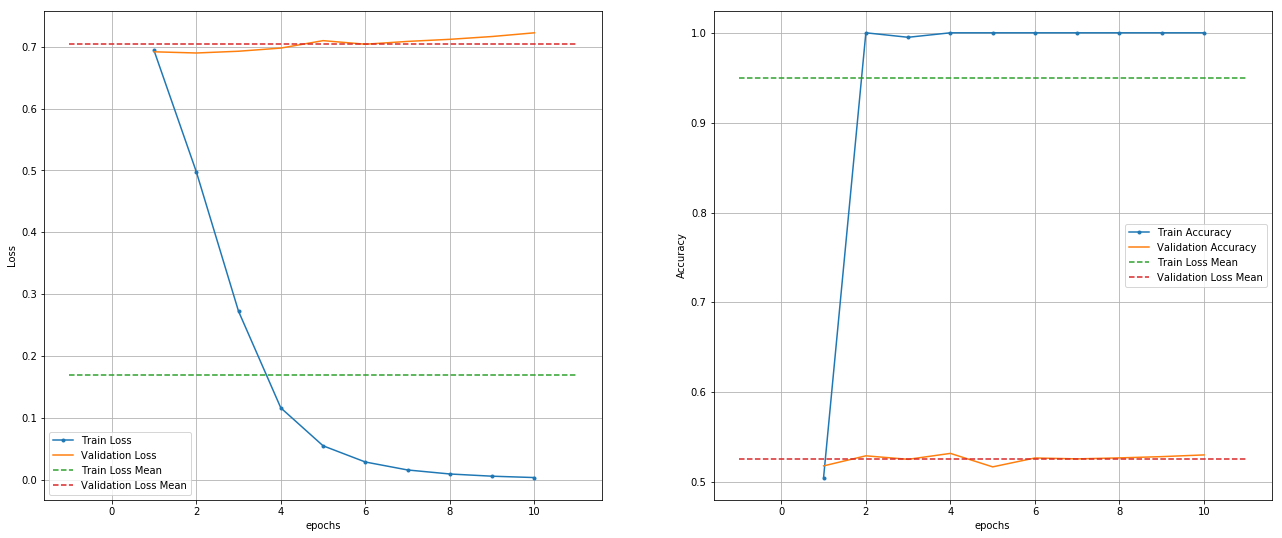

In [24]:
myutils.plot_keras_acc_ax(history)

#### Loading the test data and saved word embeddings in last exersize

In [25]:
path = '../../datasets/imdb/test/'
labels = ['pos', 'neg']


data = []
label = []
for l in labels:
    data_dir = os.path.join(path, l)
    print(data_dir)
    for file in os.listdir(data_dir):
        
        if file[-4:]=='.txt':
            with open(os.path.join(data_dir,file), encoding='utf8') as f:
                data.append(f.read())
                if l == 'pos':
                    label.append(1)
                else:
                    label.append(0)
                    
print("Data Length: ", len(data))
print("Label Length: ", len(label))

../../datasets/imdb/test/pos
../../datasets/imdb/test/neg
Data Length:  25000
Label Length:  25000


In [26]:
sequences_test = tokens.texts_to_sequences(data)

In [27]:
# padding the data
pad_test_data = keras.preprocessing.sequence.pad_sequences(sequences_test, maxlen=max_len)
test_label = np.asarray(label, dtype='float32')

print(pad_test_data.shape, test_label.shape)

(25000, 100) (25000,)


In [28]:
# loading the saved model

model.load_weights('pre_trained_glove_model.h5')
model.summary()
test_hist=model.evaluate(pad_test_data, test_label)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
25000/25000 [==============================] - 3s 103us/step


In [29]:
print(test_hist)

[0.90494666543006896, 0.51571999999999996]
